<a href="https://colab.research.google.com/github/nithin-srivatsa/LifeExpectancyPrediction_ML/blob/main/LifeExpectancy_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset
The dataset we will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training_modified.csv" and "LifeExpectancy_test_modified.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test_modified.csv"

Features :
- Year : from 2002 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
- Health_Index: Health index

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training_modified.csv", contains 1064 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test_modified.csv", contains 458 rows and 14 columns. This is the test set which only contains the features.<br/>

The goal is to predict Life expectancy based on the features.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving LifeExpectancy_test_modified.csv to LifeExpectancy_test_modified.csv
Saving LifeExpectancy_training_modified.csv to LifeExpectancy_training_modified.csv
Saving LifeExpectancy_ytest_modified.csv to LifeExpectancy_ytest_modified.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv('LifeExpectancy_training_modified.csv')
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,71.4


In [ ]:
# Display basic information about the dataset
import matplotlib.pyplot as plt
import seaborn as sns
print("Basic Information:")
print(df.info())

# Display statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1064 non-null   int64  
 1   Status                           1064 non-null   object 
 2   Adult_Mortality                  1064 non-null   int64  
 3   Alcohol                          1064 non-null   float64
 4   percentage_expenditure           1064 non-null   float64
 5   BMI                              1064 non-null   float64
 6   Total_expenditure                1064 non-null   float64
 7   Diphtheria                       1064 non-null   int64  
 8   HIV_AIDS                         1064 non-null   float64
 9   GDP                              1064 non-null   float64
 10  Population                       1064 non-null   float64
 11  Income_composition_of_resources  1064 non-null   float64
 12  S

## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>


Distributions:


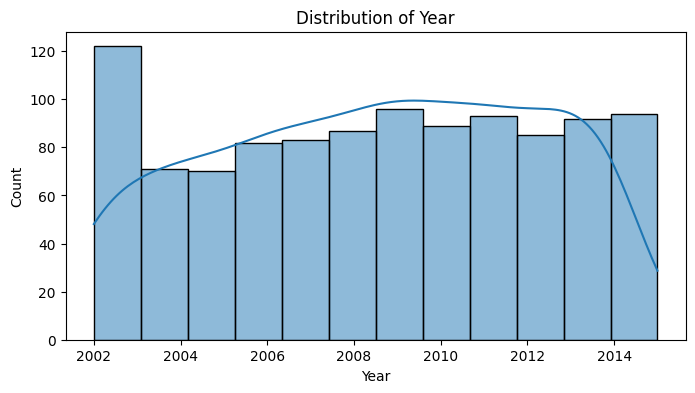

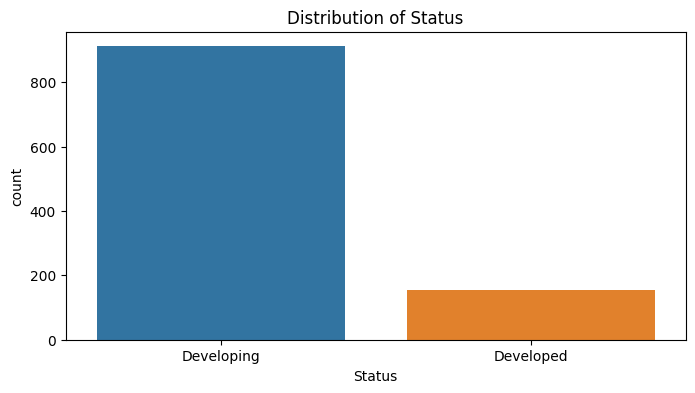

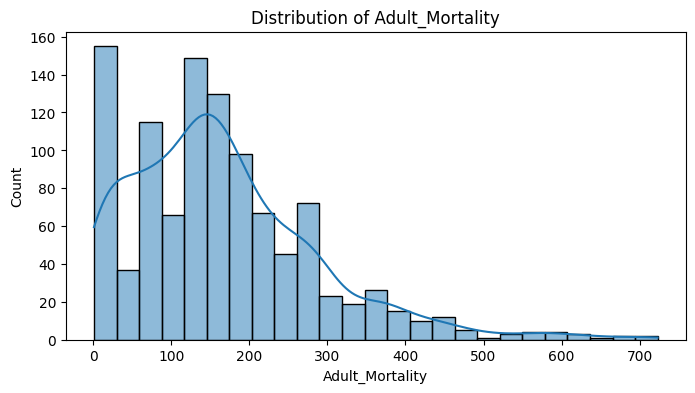

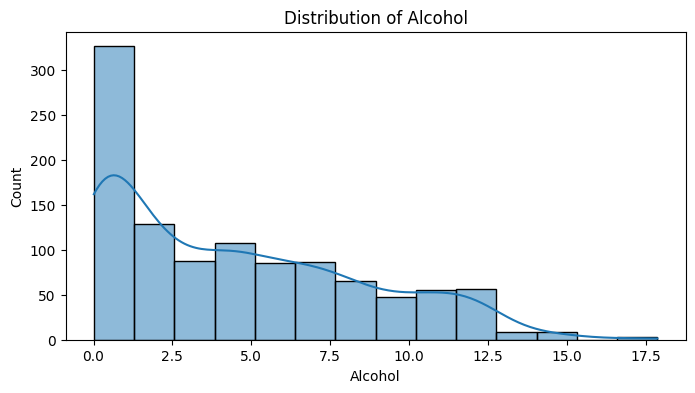

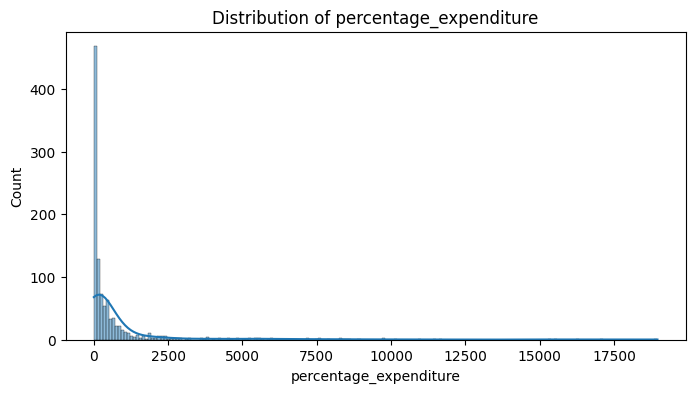

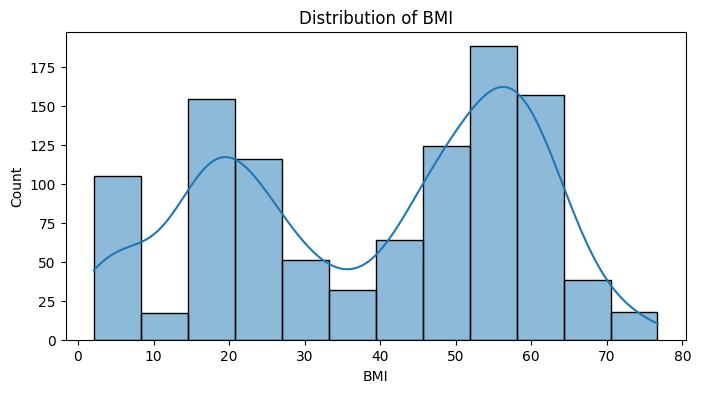

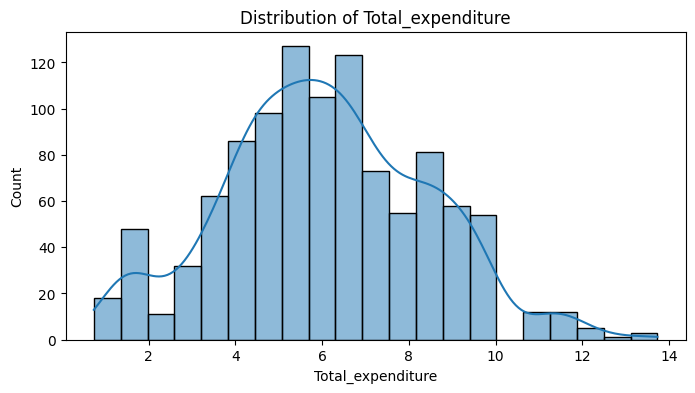

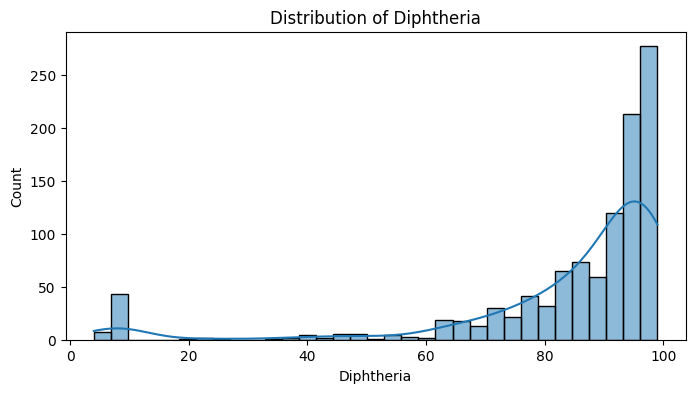

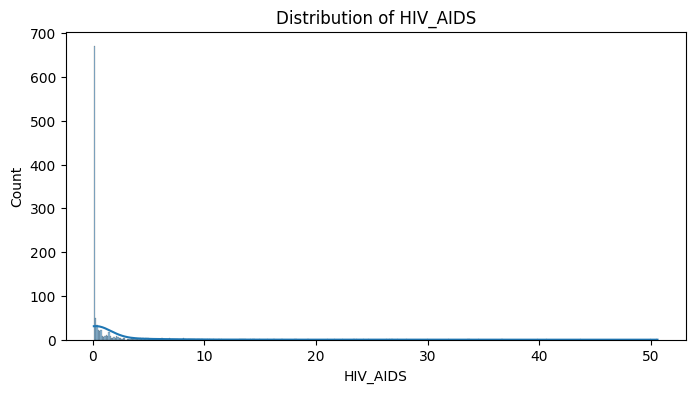

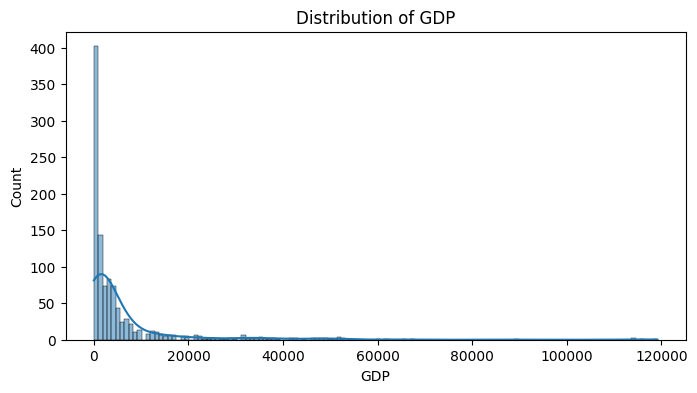

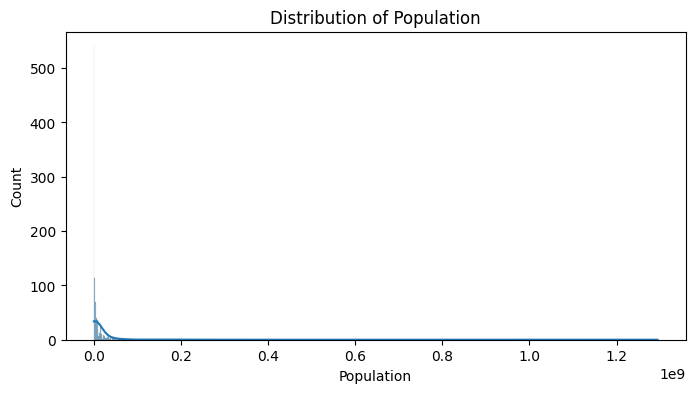

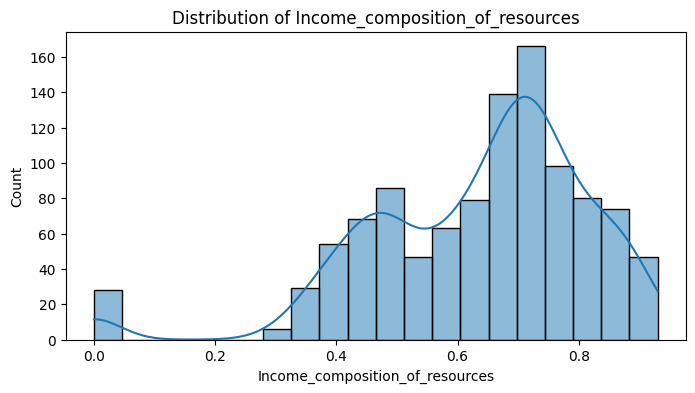

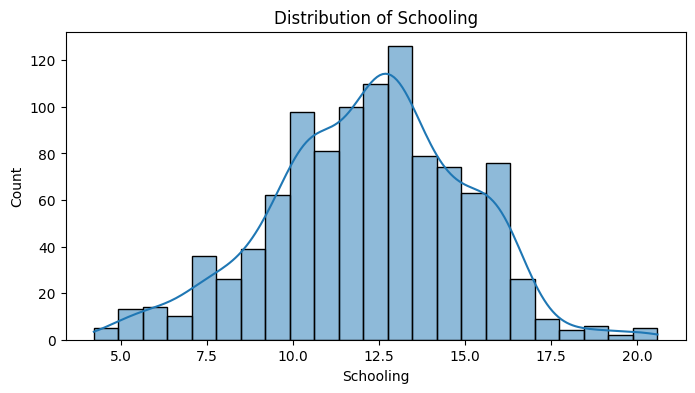

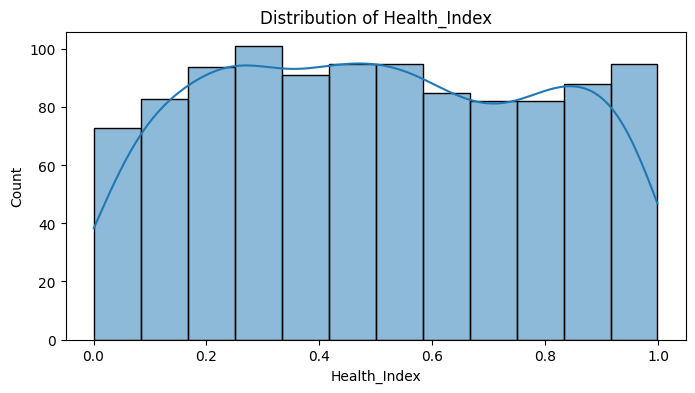

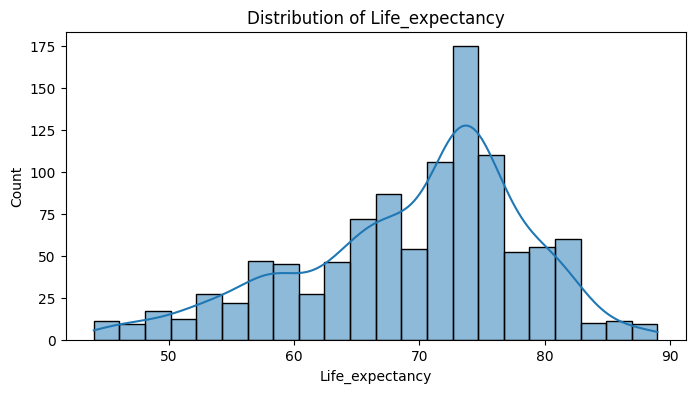

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
# Distribution of each feature and the target variable
print("\nDistributions:")
for column in df.columns:
    plt.figure(figsize=(8, 4))
    if df[column].dtype == 'object':  # Categorical data
        sns.countplot(x=df[column])
    else:  # Numerical data
        sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Some inferences from the distribution
Some variables are postive-skewed: Adult_Mortality, Alcohol, percentage_expenditure, HIV/AIDS, GDP, Population. <br>
Diphtheria is negative-skewed.

Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

In [ ]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
df.drop(columns=['Year', 'Status']).corr()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
Adult_Mortality,1.000000,-0.219509,-0.245144,-0.379248,-0.140426,-0.224493,0.501118,-0.266366,-0.014055,-0.488337,-0.463605,-0.037935,-0.698473
Alcohol,-0.219509,1.000000,0.420887,0.354946,0.237057,0.248199,-0.060254,0.444423,-0.018267,0.571995,0.605136,0.033899,0.439279
percentage_expenditure,-0.245144,0.420887,1.000000,0.227755,0.191810,0.149074,-0.104598,0.956792,-0.014828,0.407670,0.415462,-0.008822,0.412576
BMI,-0.379248,0.354946,0.227755,1.000000,0.182665,0.197733,-0.231807,0.246639,-0.061193,0.545933,0.561119,0.008316,0.557677
Total_expenditure,-0.140426,0.237057,0.191810,0.182665,1.000000,0.161840,0.012584,0.190730,-0.071048,0.201951,0.254128,0.021584,0.211976
Diphtheria,-0.224493,0.248199,0.149074,0.197733,0.161840,1.000000,-0.170364,0.171035,-0.019880,0.320582,0.362596,-0.009137,0.366748
HIV_AIDS,0.501118,-0.060254,-0.104598,-0.231807,0.012584,-0.170364,1.000000,-0.120317,-0.030525,-0.284304,-0.246180,-0.016758,-0.588284
GDP,-0.266366,0.444423,0.956792,0.246639,0.190730,0.171035,-0.120317,1.000000,-0.016040,0.454385,0.461627,-0.013335,0.445212
Population,-0.014055,-0.018267,-0.014828,-0.061193,-0.071048,-0.019880,-0.030525,-0.016040,1.000000,0.003342,-0.020537,-0.005315,-0.009788
Income_composition_of_resources,-0.488337,0.571995,0.407670,0.545933,0.201951,0.320582,-0.284304,0.454385,0.003342,1.000000,0.806302,0.014219,0.756515


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization.

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set.

In [ ]:
# dft = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test.csv']))
dft = pd.read_csv('LifeExpectancy_test_modified.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###
X = df.loc[:, df.columns != 'Life_expectancy'].copy()
X_full = pd.concat([X, dft], axis=0)

In [ ]:
scaler = StandardScaler()
X_numeric = scaler.fit_transform(
    X_full.drop(columns=['Year', 'Status'])) #numpy.ndarray

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [ ]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###
enc_Year = OneHotEncoder(sparse=False)
X_onhot_Year = enc_Year.fit_transform(X_full[['Year']]) #numpy.ndarray
enc_Status = OneHotEncoder(sparse=False, drop=['Developed'])
X_onhot_Status = enc_Status.fit_transform(X_full[['Status']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_full_transform = np.concatenate([X_numeric, X_onhot_Year, X_onhot_Status], axis=1)
X_train = X_full_transform[:-dft.shape[0],:] #numpy.ndarray
X_test = X_full_transform[-dft.shape[0]:,:]  #numpy.ndarray
y_train = df["Life_expectancy"] #numpy.ndarray
### PRINT THE SHAPE OF YOUR TRAINING SET X ###
X_train.shape

(1064, 27)

In [ ]:
dft.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Health_Index,Schooling
0,2011,Developing,275,0.01,7.097109,17.2,7.87,68,0.1,63.537231,2978599.0,0.454,0.960279,9.5
1,2008,Developing,287,0.03,25.873925,15.7,8.33,64,0.1,373.361116,2729431.0,0.433,0.655069,8.7
2,2011,Developing,88,5.37,437.062100,55.1,5.71,99,0.1,4437.178680,295195.0,0.738,0.746627,13.3
3,2005,Developing,15,5.16,26.993121,49.9,6.12,98,0.1,279.142931,311487.0,0.685,0.527981,10.8
4,2003,Developing,18,4.29,14.719289,47.9,6.27,97,0.1,189.681557,339616.0,0.674,0.336332,10.7


Q7. What are the other types of encodings and why did we use One-hot encoding for "Year" and "Status"?

Ans- Label Encoding, Ordinal Encoding, Target Encoding, and Binary Encoding;  "Year" and "Status" variables are nominal categories and One-hot encoding ensures that fetures does not assume that higher numbers are more important.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### Fit the Multiple Linear Regression model on training set ###
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [ ]:
# y_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_ytest.csv']))
y_test = pd.read_csv('LifeExpectancy_ytest_modified.csv')

In [ ]:
### Evaluate the Linear Regression model by computing MSE on both training set and test set ###
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Training MSE: {}'.format(mse_train))
print('Test MSE: {}'.format(mse_test))

Training MSE: 12.747314971108775
Test MSE: 13.914847989831298


In [ ]:
print(lr_model.coef_)

[-2.06829411 -0.49025663  0.59494515  0.70440815  0.25495399  0.51766529
 -2.84196366  0.14913411 -0.06395167  2.15261669  2.63427779  0.25058011
  0.55633889  0.8942586   0.56104421  0.57867056  0.28113869  0.22511998
 -0.09797239 -0.40550117 -0.55842329 -0.78168663 -0.71691738 -0.85083851
 -0.85742573  1.17219418 -0.63091377]


In [ ]:
X_numeric_name=list(X_full.drop(columns=['Year', 'Status'])) #the corresponding variable names for the linear regression coefficients
X_numeric_name.extend(['Year_2002','Year_2003','Year_2004','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010','Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Status_Developing'])
print(X_numeric_name)

['Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Income_composition_of_resources', 'Schooling', 'Health_Index', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Status_Developing']


GDP and percentage_expenditure exhibit high correlation. Schooling and Income_composition_of_resources also exhibit high correlation.
It may be useful to remove one of them and observe the results.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation.

Fill in the code for calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
x1 = df["Schooling"].values.reshape(-1,1)
y1 = df["Life_expectancy"].values.reshape(-1,1)
slr_model = LinearRegression()
slr_model.fit(x1, y1)
y_pred1 = slr_model.predict(x1)
r1=r2_score(y1, y_pred1)
# Print R2 score
print(r1)

0.5702238510104203


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:
x2 = df[["Schooling", "Adult_Mortality"]].values
y1 = df["Life_expectancy"].values.reshape(-1,1)
slr_model = LinearRegression()
slr_model.fit(x2, y1)
y_pred2 = slr_model.predict(x2)
r2=r2_score(y1, y_pred2)
# Print R2 score
print(r2)

0.7248288890984036


$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
x3 = df[["Schooling", "Adult_Mortality","Population"]].values
y1 = df["Life_expectancy"].values.reshape(-1,1)
slr_model = LinearRegression()
slr_model.fit(x3, y1)
y_pred3 = slr_model.predict(x3)
r3=r2_score(y1, y_pred3)
# Print R2 score
print(r3)

0.7248514023230492


Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
adj_r2 = (1 - (1 - r1) * ((x1.shape[0] - 1) /
          (x1.shape[0] - x1.shape[1] - 1)))
# Print Adjusted R2 score
print(adj_r2)

0.5698191653710705


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
adj_r2 = (1 - (1 - r2) * ((x2.shape[0] - 1) /
          (x2.shape[0] - x2.shape[1] - 1)))
# Print Adjusted R2 score
print(adj_r2)

0.7243101876640934


Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
adj_r2 = (1 - (1 - r3) * ((x3.shape[0] - 1) /
          (x3.shape[0] - x3.shape[1] - 1)))
# Print Adjusted R2 score
print(adj_r2)

0.7240726798767938


### K-fold Cross-Validation

In [ ]:
import random

In [ ]:
# Second design a function to implement 5-fold cross-validation.
# The input: training data with features X , training target y, # of folds f.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y, f):
    ### Write your code here ###
    cross_mse_val = [] #maintain the MSE for different k'th folds

    indices_all = list(range(len(y)))
    random.seed(300)
    random.shuffle(indices_all)
    indices = np.array_split(indices_all, f)

    # determine training and validation set
    for k in range(f):
        train_index = np.setdiff1d(indices_all, indices[k])
        X_train_cv = X[train_index]
        X_val = X[indices[k]]
        y_train_cv = y[train_index]
        y_val = y[indices[k]]
        # linear regression on all training but k'th fold
        lr = LinearRegression()
        lr.fit(X_train_cv, y_train_cv)
        # calculate the MSE on k'th fold
        y_val_pred = lr.predict(X_val)
        mse_val = mean_squared_error(y_val, y_val_pred)

        cross_mse_val.append(mse_val)

    return(np.mean(cross_mse_val))

In [ ]:
cross_val_mse(X_train, y_train, f=5)

13.463162625471494

In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
# List to maintain the different cross-validation MSE scores
cross_val_mse_list = []

# List to maintain the different combinations of features
features = []

# Loop to compute the cross-validation MSE of different feature combinations
for i in tqdm(range(1, X_full.shape[1]+1)):
    comb = combinations(X_full, i)
    for fea in comb:
        fea = list(fea)
        X = X_full[fea]
        num_exist=list(set(X.columns) - set(['Year', 'Status']))
        cat_exist=list(set(X.columns) & set(['Year', 'Status']))
        enc = OneHotEncoder(sparse=False, drop='first')
        scaler = StandardScaler()
        if num_exist == []:
            X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
            X_trans = X_oh
        elif cat_exist == []:
            X_num = scaler.fit_transform(X[num_exist])
            X_trans = X_num
        else:
            X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
            X_num = scaler.fit_transform(X[num_exist])
            X_trans = np.concatenate([X_num, X_oh], axis=1)
        X_train_cro = X_trans[:-dft.shape[0],:] #current training set 2d array
        X_test_cro = X_trans[-dft.shape[0]:,:] #current test set
        y_train = df["Life_expectancy"]

        avg_mse = cross_val_mse(X_train_cro, y_train, f = 5)
        cross_val_mse_list.append(avg_mse)
        features.append(fea)


100%|██████████| 14/14 [08:53<00:00, 38.08s/it]


In [ ]:
# Print a list of the best covariates
val, idx = min((val, idx) for (idx, val) in enumerate(cross_val_mse_list))
best_feature = features[idx]
print(best_feature)


['Status', 'Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling', 'Health_Index']


In [ ]:
# Print the corresponding mse
val

13.378220023911371

In [ ]:
X = X_full[best_feature]
num_exist=list(set(X.columns) - set(['Year', 'Status']))
cat_exist=list(set(X.columns) & set(['Year', 'Status']))
enc = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()
if num_exist == []:
    X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
    X_trans = X_oh
elif cat_exist == []:
    X_num = scaler.fit_transform(X[num_exist])
    X_trans = X_num
else:
    X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
    X_num = scaler.fit_transform(X[num_exist])
    X_trans = np.concatenate([X_num, X_oh], axis=1)

X_train = X_trans[:-dft.shape[0],:]
y_train = df["Life_expectancy"]
X_test = X_trans[-dft.shape[0]:,:]

# Bulding and fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test) #y_test maintain the label for testset

# Evaluating the Linear Regression model by computing MSE on test set
print('Training MSE: {}'.format(mse_train))
print('Test MSE: {}'.format(mse_test))

Training MSE: 13.078362534675707
Test MSE: 13.897573296351325


In [ ]:
y_test.shape

(458, 1)

In [ ]:
#end

if we use sklearn.model_selection.cross_val_score:

In [ ]:
from sklearn.model_selection import cross_val_score
from itertools import combinations

# List to maintain the different cross-validation MSE scores
cross_val_mse_list = []

# List to maintain the different combinations of features
features = []

# Loop to compute the cross-validation MSE of different feature combinations
for i in range(1, X_full.shape[1]+1):
    comb = combinations(X_full, i)
    for fea in comb:
        fea = list(fea)
        X = X_full[fea]
        num_exist=list(set(X.columns) - set(['Year', 'Status']))
        cat_exist=list(set(X.columns) & set(['Year', 'Status']))
        enc = OneHotEncoder(sparse=False, drop='first')
        scaler = StandardScaler()
        if num_exist == []:
            X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
            X_trans = X_oh
        elif cat_exist == []:
            X_num = scaler.fit_transform(X[num_exist])
            X_trans = X_num
        else:
            X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
            X_num = scaler.fit_transform(X[num_exist])
            X_trans = np.concatenate([X_num, X_oh], axis=1)
        X_train_cro = X_trans[:-dft.shape[0],:] #current training set 2d array
        X_test_cro = X_trans[-dft.shape[0]:,:] #current test set
        y_train = df["Life_expectancy"]

        lr = LinearRegression()
        mse = -cross_val_score(lr, X_train_cro, y_train, cv = 5, scoring=('neg_mean_squared_error'))
        avg_mse = np.mean(mse)
        cross_val_mse_list.append(avg_mse)
        features.append(fea)

In [ ]:
# Print a list of the best covariates
val, idx = min((val, idx) for (idx, val) in enumerate(cross_val_mse_list))
best_feature = features[idx]
print(best_feature)

['Status', 'Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling', 'Health_Index']


In [ ]:
# Print the corresponding mse
val

13.604338400104826

In [ ]:
#on test set
X = X_full[best_feature]
num_exist=list(set(X.columns) - set(['Year', 'Status']))
cat_exist=list(set(X.columns) & set(['Year', 'Status']))
enc = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()
if num_exist == []:
    X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
    X_trans = X_oh
elif cat_exist == []:
    X_num = scaler.fit_transform(X[num_exist])
    X_trans = X_num
else:
    X_oh = enc.fit_transform(X.drop(num_exist, axis=1))
    X_num = scaler.fit_transform(X[num_exist])
    X_trans = np.concatenate([X_num, X_oh], axis=1)

X_train = X_trans[:-dft.shape[0],:]
y_train = df["Life_expectancy"]
X_test = X_trans[-dft.shape[0]:,:]

# Bulding and fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test) #y_test maintain the label for testset

# Evaluating the Linear Regression model by computing MSE on test set
print('Training MSE: {}'.format(mse_train))
print('Test MSE: {}'.format(mse_test))

Training MSE: 13.078362534675707
Test MSE: 13.897573296351325
